# Solving the simple harmonic oscillator ODEs

# Q1. Write a forward Euler (also called explicit Euler) solver for the simple harmonic oscillator ODEs with k = 2, m = 0.5, and β = 0 -- that is, no friction.  Check your solver using the unit 5.3 quiz: start from the initial condition [x(t = 0), v(t = 0)]T = [-1, -2]T with a timestep of Δt = 0.1, find [x(t = 0.1),v(t = 0.1)]T and compare it to the quiz solutions.

# (a)  Now use your forward Euler solver to compute [x(t = 0.5),v(t = 0.5)]T, given the same ODE, parameters, initial condition, and time step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def SHO(input, k, m):
    return np.array([input[1], -input[0]*k/m])

In [3]:
inputs = np.array([-1.0,-2.0]); t = 0;
k = 2; m = 0.5; dt = 0.1;

In [4]:
for t in range(5):
    inputs = inputs + dt*SHO(inputs,k,m);
    t = dt + t
    
print(inputs) # Answer to (a)

[-1.52832  0.62464]


# Answer:
# x(t=0.5) = -1.528
# v(t=0.5) = 0.625

# (b) Using the same ODE, solver, parameter values, initial condition, and time step, generate a 200-point trajectory and plot it in the state space (i.e., with the position x of the mass plotted on the x-axis and the velocity v on the y-axis).  Now repeat that plot with Δt = 0.11.  What are the differences between these two trajectories?

In [5]:
results1 = np.zeros((200,2));
results2 = np.zeros((200,2));
dt1 = 0.1;
dt2 = 0.11; 

# at initial points
results1[0, :] = inputs;
results2[0, :] = inputs;

for t in range(1, 200):
    results1[t,:] = results1[t-1,:] + dt1*SHO(results1[t-1,:] , k,m);
    results2[t,:] = results2[t-1,:] + dt2*SHO(results2[t-1,:] , k,m);

In [6]:
plt.plot(results1[:,0], results1[:,1]);
plt.plot(results2[:,0], results2[:,1]);
plt.legend(['t=0.1', 't=0.11'])

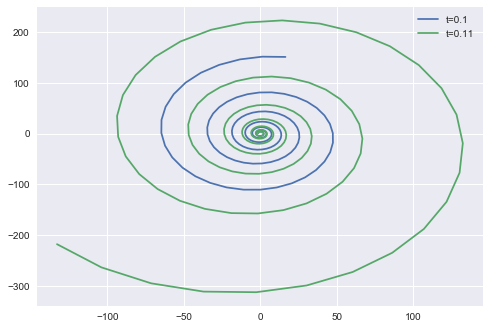

In [7]:
plt.show()

# Answer: The Δt = 0.11 one spirals out faster

# Q2. 

# (a)  Write a backward Euler (also called implicit Euler) solver for the simple harmonic oscillator ODEs with k = 2, m = 0.5, and β = 0.

In [8]:
# initial conditions
inputs = np.array([-1.0,-2.0]); t = 0;
k = 2; m = 0.5; dt = 0.1;

In [9]:
for t in range(5):
    plus_inputs= inputs + dt*SHO(inputs, k, m);
    inputs =  inputs + dt*SHO(plus_inputs, k, m);
    t = dt + t

print(inputs) # Answer to (a)

[-1.24509686  0.61356052]


# Answer
# x(t=0.5) = -1.245
# v(t=0.5) = 0.6136

# (b)  Repeat problem 1(b) above using your backward Euler solver instead.  What are the differences between these two trajectories?

In [10]:
results1 = np.zeros((200,2)); # forward
results2 = np.zeros((200,2)); # backward
dt1 = 0.1;
dt2 = 0.11; 

# at initial points
results1[0, :] = inputs;
results2[0, :] = inputs;

for t in range(1, 200):
    plus1 = results1[t-1,:] + dt2*SHO(results1[t-1,:] , k,m);
    results1[t,:] = results1[t-1,:] + dt1*SHO(plus1 , k,m);
    plus2 = results2[t-1,:] + dt2*SHO(results2[t-1,:] , k,m);
    results2[t,:] = results2[t-1,:] + dt2*SHO(plus2, k,m);

In [11]:
plt.plot(results1[:,0], results1[:,1]);
plt.plot(results2[:,0], results2[:,1]);
plt.legend(['Forward Euler', 'Backward Euler'])

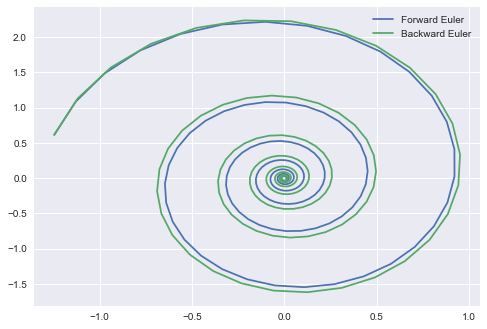

In [12]:
plt.show()

# Answer: The Δt = 0.11 one spirals in faster

# (c) Using the same ODE, parameter values, and initial condition, and a time step Δt = 0.1, generate two 50-point trajectories, one using forward Euler and the other using backward Euler.  Plot them both on the same state-space axes.  What is the difference?

In [13]:
results1 = np.zeros((50,2)); # forward
results2 = np.zeros((50,2)); # backward
dt = 0.1;

# at initial points
results1[0, :] = inputs;
results2[0, :] = inputs;

for t in range(1, 50):
    results1[t,:]= results1[t-1,:] + dt*SHO(results1[t-1,:] , k,m);
    plus2 = results2[t-1,:] + dt*SHO(results2[t-1,:] , k,m);
    results2[t,:] = results2[t-1,:] + dt2*SHO(plus2, k,m);

In [14]:
plt.plot(results1[:,0], results1[:,1]);
plt.plot(results2[:,0], results2[:,1]);
plt.legend(['Forward Euler', 'Backward Euler'])

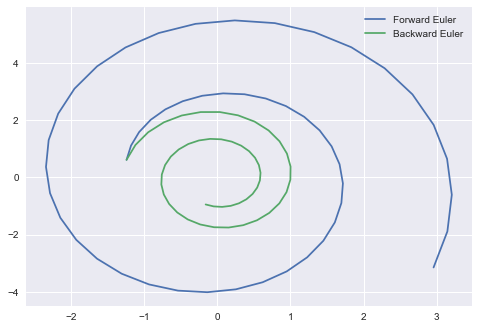

In [15]:
plt.show()

# Answer: One spirals in and one spirals out